# Exploring Dandiset 001361: A flexible hippocampal population code for experience relative to reward

> ⚠️ **AI-Generated Content Warning**: This notebook was generated by an AI assistant and has not been fully verified. Please be cautious when interpreting the code or results, and verify important findings independently.

## Overview

This notebook demonstrates how to access and analyze data from Dandiset 001361, which contains two-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. The dataset is part of the study "A flexible hippocampal population code for experience relative to reward" by Sosa, Plitt, & Giocomo, published in Nature Neuroscience.

The study investigates how hippocampal place cells encode sequences of events relative to reward locations. Through two-photon imaging of hippocampal CA1 as mice navigated virtual environments with changing hidden reward locations, the researchers found that a subpopulation of neurons updated their firing fields to maintain the same relative position with respect to reward, constructing behavioral timescale sequences spanning the entire task.

You can access the complete dataset at: [https://dandiarchive.org/dandiset/001361/0.250406.0045](https://dandiarchive.org/dandiset/001361/0.250406.0045)

In this notebook, we will:
1. Load and explore the Dandiset metadata
2. Access one of the NWB files from the dataset
3. Examine the behavioral data (position, speed, rewards)
4. Visualize neuronal activity data
5. Investigate relationships between neural activity and behavior

## Required Packages

This notebook requires the following packages:
- `pynwb` - for working with NWB files
- `h5py` - for handling HDF5 files
- `remfile` - for remote file access
- `numpy` - for numerical operations
- `matplotlib` - for plotting
- `pandas` - for data manipulation
- `seaborn` - for enhanced visualizations
- `dandi` - for accessing the DANDI archive

In [1]:
# Import required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from itertools import islice

# For accessing DANDI
from dandi.dandiapi import DandiAPIClient

# For working with NWB files
import pynwb
import h5py
import remfile

# Set up plotting
sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 6)

## Accessing the Dandiset

Let's start by connecting to the DANDI archive and retrieving basic information about the Dandiset.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001361", "0.250406.0045")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset ID: {metadata['identifier']}")
print(f"Version: {metadata['version']}")
print(f"Description: {metadata.get('description', '')[:500]}...")  # First 500 chars for brevity

# Handle contributors (might be a list of dictionaries or strings)
contributors = metadata.get('contributor', [])
if contributors and isinstance(contributors[0], dict):
    contributor_str = ', '.join(c.get('name', str(c)) for c in contributors if 'name' in c)
else:
    contributor_str = ', '.join(contributors)
print(f"\nContributors: {contributor_str}")

# Handle keywords
keywords = metadata.get('keywords', [])
print(f"Keywords: {', '.join(keywords)}")

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset ID: DANDI:001361
Version: 0.250406.0045
Description: 2-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. Included in Sosa, Plitt, & Giocomo, "A flexible hippocampal population code for experience relative to reward," Nature Neuroscience.

To reinforce rewarding behaviors, events leading up to and following rewards must be remembered. Hippocampal place cell activity spans spatial and non-spatial episodes, but whether hippocampal activity encodes entire sequences of events relative to reward is u...

Contributors: National Institutes of Health (NIH), Sosa, Marielena, Plitt, Mark H., Giocomo, Lisa M.
Keywords: hippocampus, navigation, learning, memory, 2-photon imaging, place cells


### Exploring the assets in the Dandiset

Now, let's look at the available assets (files) in this Dandiset. We'll list a few of them to get a sense of what's available.

In [3]:
# List some assets in the Dandiset
assets = dandiset.get_assets()
print("First 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier}, Size: {asset.size/1e6:.2f} MB)")

First 5 assets:
- sub-m11/sub-m11_ses-05_behavior+ophys.nwb (ID: a22cc1da-b5e8-4fea-a770-7b83a6e79656, Size: 99.31 MB)
- sub-m11/sub-m11_ses-04_behavior+ophys.nwb (ID: b53ef825-89ca-483e-abeb-b38a0ae9293c, Size: 89.67 MB)
- sub-m11/sub-m11_ses-07_behavior+ophys.nwb (ID: 27481b95-aeb2-4108-b7ac-b3859892da7a, Size: 119.72 MB)
- sub-m11/sub-m11_ses-06_behavior+ophys.nwb (ID: 5a5da0ea-5e7a-497b-a3aa-7e6ee1628bde, Size: 94.61 MB)
- sub-m11/sub-m11_ses-08_behavior+ophys.nwb (ID: d4e069d6-40f6-4702-92d4-70abfd65c1bd, Size: 128.45 MB)


## Loading and exploring an NWB file

For this notebook, we'll focus on one of the NWB files from subject m11, session 03. This file contains two-photon imaging data from hippocampal area CA1 along with behavioral data during virtual navigation.

In [4]:
# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/"
print(f"Loading NWB file from: {url}")

remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print basic information about the file
print(f"\nNWB File information:")
print(f"Session ID: {nwb.session_id}")
print(f"Session Description: {nwb.session_description}")
print(f"Experiment Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Experimenter: {', '.join(nwb.experimenter)}")

# Print subject information
subject = nwb.subject
print(f"\nSubject Information:")
print(f"Subject ID: {subject.subject_id}")
print(f"Species: {subject.species}")
print(f"Sex: {subject.sex}")
print(f"Date of Birth: {subject.date_of_birth}")

Loading NWB file from: https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB File information:
Session ID: 03
Session Description: processed suite2p data
Experiment Identifier: /data/InVivoDA/GCAMP11/23_02_2023/Env1_LocationB_to_A
Session Start Time: 2023-02-23 00:00:00-08:00
Experimenter: Mari Sosa

Subject Information:
Subject ID: m11
Species: Mus musculus
Sex: M
Date of Birth: 2022-09-20 00:00:00-07:00


### Exploring NWB file structure

The NWB file contains various types of data organized in a hierarchical structure. Let's explore the main components of this file.

In [5]:
# Create a summary of the NWB file structure
print("NWB File Structure Summary:\n")

# Processing modules
print("Processing Modules:")
for module_name, module in nwb.processing.items():
    print(f"  - {module_name}: {module.description}")
    print(f"    Interfaces: {', '.join(module.data_interfaces.keys())}")

# Acquisition
print("\nAcquisition:")
for name in nwb.acquisition.keys():
    print(f"  - {name}")

# Devices
print("\nDevices:")
for name, device in nwb.devices.items():
    print(f"  - {name}: {device.description}")

# Imaging Planes
print("\nImaging Planes:")
for name, plane in nwb.imaging_planes.items():
    print(f"  - {name}: {plane.description}")
    print(f"    Location: {plane.location}")
    print(f"    Indicator: {plane.indicator}")
    print(f"    Imaging Rate: {plane.imaging_rate} Hz")

NWB File Structure Summary:

Processing Modules:
  - behavior: behavior data
    Interfaces: BehavioralTimeSeries
  - ophys: optical physiology processed data
    Interfaces: Backgrounds_0, Deconvolved, Fluorescence, ImageSegmentation, Neuropil

Acquisition:
  - TwoPhotonSeries

Devices:
  - Microscope: My two-photon microscope

Imaging Planes:
  - ImagingPlane: standard
    Location: hippocampus, CA1
    Indicator: GCaMP7f
    Imaging Rate: 15.5078125 Hz


You can explore this NWB file using Neurosift, an interactive web-based viewer: 
[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&dandisetId=001361&dandisetVersion=0.250406.0045](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&dandisetId=001361&dandisetVersion=0.250406.0045)

## Exploring Behavioral Data

The NWB file contains various behavioral time series data that were recorded during the experiment. Let's first look at what behavioral data is available and then visualize some key metrics.

In [6]:
# Get behavioral data
behavior_module = nwb.processing['behavior']
behavioral_timeseries = behavior_module.data_interfaces['BehavioralTimeSeries']

# List available behavioral time series
print("Available behavioral time series:")
for name in behavioral_timeseries.time_series.keys():
    ts = behavioral_timeseries.time_series[name]
    print(f"  - {name}: {ts.description} ({ts.unit})")
    print(f"    Shape: {ts.data.shape}, Time points: {ts.timestamps.shape}")

Available behavioral time series:
  - Reward: reward delivery (mL)
    Shape: (69,), Time points: (69,)
  - autoreward: whether trial was automatically rewarded if the subject failed to lick (integer)
    Shape: (20684,), Time points: (20684,)
  - environment: Virtual reality environment (AU)
    Shape: (20684,), Time points: (20684,)
  - lick: lick detection by capacitive sensor, cumulative per imaging frame (AU)
    Shape: (20684,), Time points: (20684,)
  - position: Position in a virtual linear track (cm)
    Shape: (20684,), Time points: (20684,)
  - reward_zone: reward zone entry (binary) (integer)
    Shape: (20684,), Time points: (20684,)
  - scanning: whether scanning occurred to collect ophys data (integer)
    Shape: (20684,), Time points: (20684,)
  - speed: the speed of the subject measured over time (cm/s)
    Shape: (20684,), Time points: (20684,)
  - teleport: end of a trial, i.e. entry into the intertrial interval (integer)
    Shape: (20684,), Time points: (20684,)
  

### Visualizing position data and rewards

Let's visualize the animal's position in the virtual linear track and when rewards were delivered.

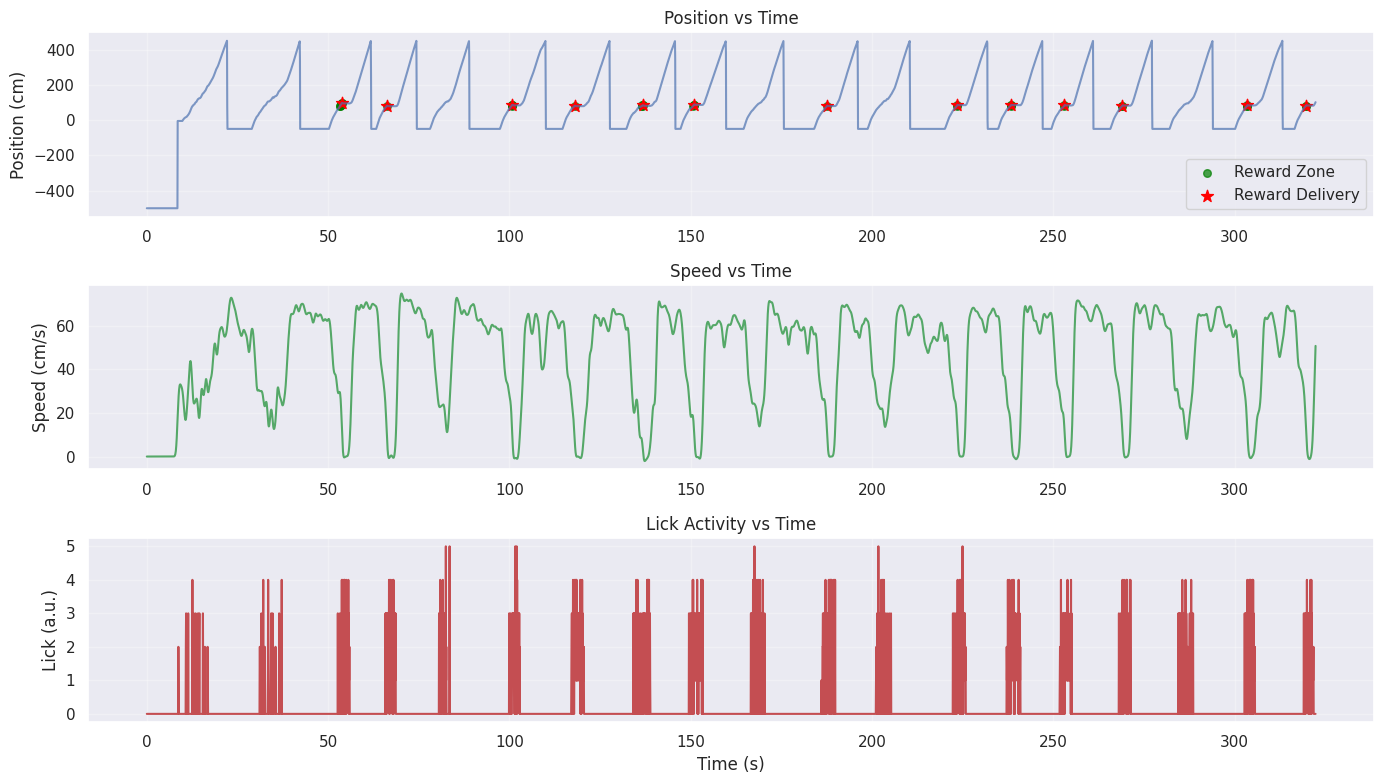

In [7]:
# Get position and reward data
position = behavioral_timeseries.time_series['position']
reward = behavioral_timeseries.time_series['Reward']
reward_zone = behavioral_timeseries.time_series['reward_zone']
speed = behavioral_timeseries.time_series['speed']
lick = behavioral_timeseries.time_series['lick']
trial_number = behavioral_timeseries.time_series['trial number']

# Let's look at a segment of the data (e.g., first 5000 time points)
segment_end = 5000
position_data = position.data[:segment_end]
position_timestamps = position.timestamps[:segment_end]
reward_zone_data = reward_zone.data[:segment_end]
speed_data = speed.data[:segment_end]
lick_data = lick.data[:segment_end]
trial_num_data = trial_number.data[:segment_end]

# Create a DataFrame for easier manipulation
behavior_df = pd.DataFrame({
    'time': position_timestamps,
    'position': position_data,
    'reward_zone': reward_zone_data,
    'speed': speed_data,
    'lick': lick_data,
    'trial': trial_num_data
})

# Get all rewards (all time points)
reward_times = reward.timestamps[:]
reward_amounts = reward.data[:]

# Plot position over time with rewards
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 1)
plt.plot(behavior_df['time'], behavior_df['position'], 'b-', alpha=0.7)
plt.scatter(behavior_df['time'][behavior_df['reward_zone'] > 0], 
            behavior_df['position'][behavior_df['reward_zone'] > 0], 
            color='green', alpha=0.7, s=30, label='Reward Zone')
# Add reward delivery times
reward_in_segment = [t for t in reward_times if t <= position_timestamps[-1]]
if reward_in_segment:
    plt.scatter(reward_in_segment, 
                np.interp(reward_in_segment, position_timestamps, position_data),
                color='red', s=80, marker='*', label='Reward Delivery')
plt.title('Position vs Time')
plt.ylabel('Position (cm)')
plt.grid(True, alpha=0.3)
plt.legend()

# Plot speed
plt.subplot(3, 1, 2)
plt.plot(behavior_df['time'], behavior_df['speed'], 'g-')
plt.title('Speed vs Time')
plt.ylabel('Speed (cm/s)')
plt.grid(True, alpha=0.3)

# Plot licks
plt.subplot(3, 1, 3)
plt.plot(behavior_df['time'], behavior_df['lick'], 'r-')
plt.title('Lick Activity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Lick (a.u.)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Trial structure and reward locations

Now let's look at the trial structure and how the position relates to rewards. We'll visualize multiple trials to see if there are patterns in the animal's behavior.

Number of trials in segment: 20


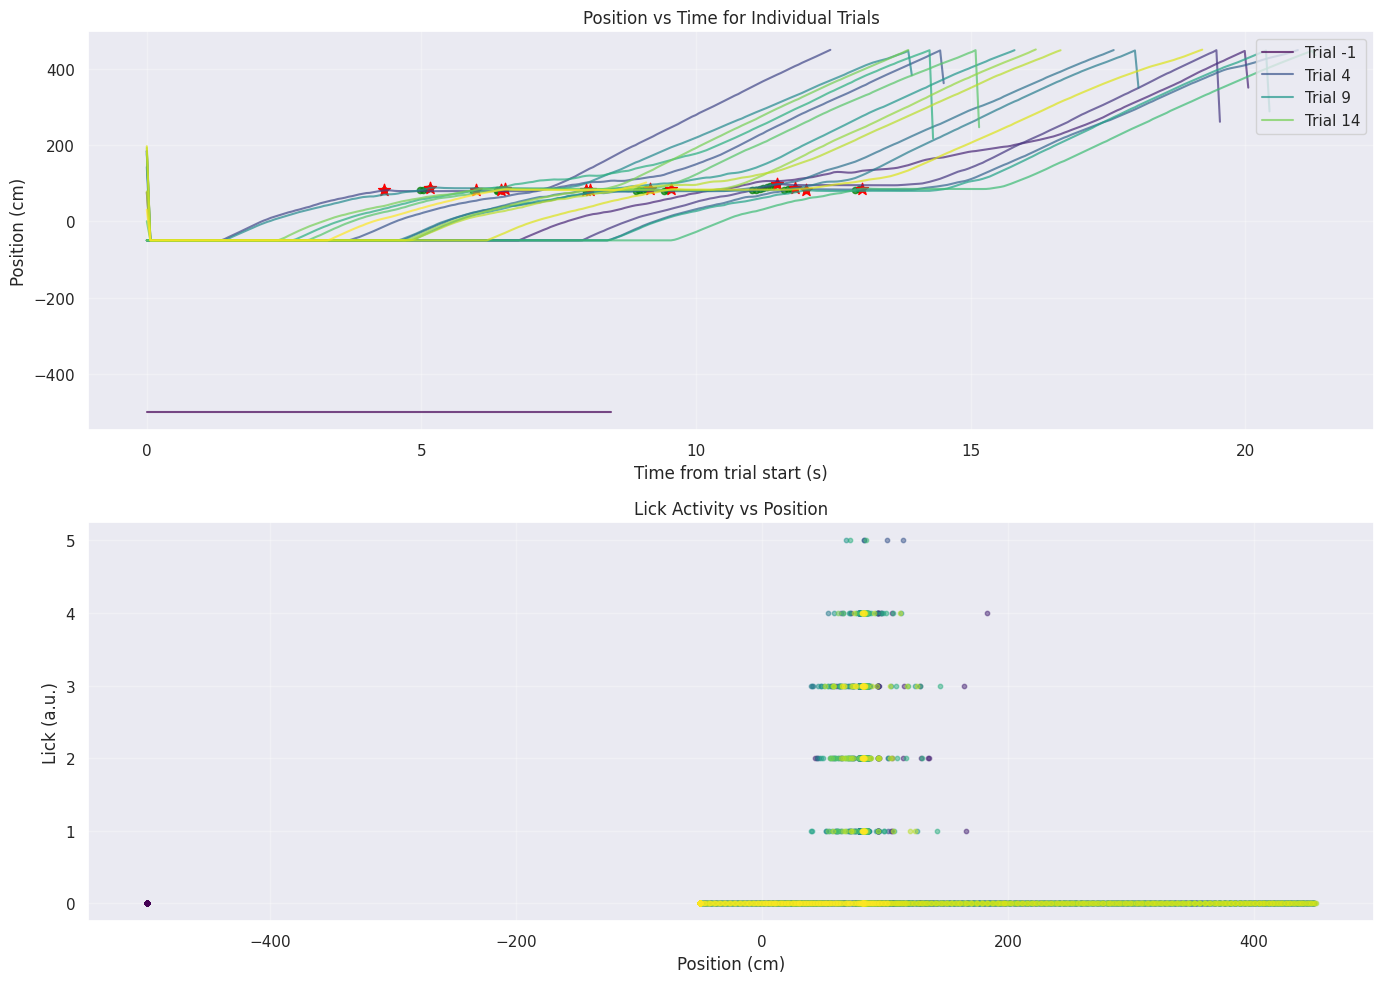

In [8]:
# Let's examine trials more closely
# First, identify trial boundaries
trial_transitions = np.where(np.diff(trial_num_data) != 0)[0]
trial_starts = np.hstack([[0], trial_transitions + 1])
trial_ends = np.hstack([trial_transitions, [len(trial_num_data) - 1]])
unique_trials = np.unique(trial_num_data).astype(int)

print(f"Number of trials in segment: {len(unique_trials)}")

# Plot position for each trial
plt.figure(figsize=(14, 10))

# Color map for trials
cmap = plt.cm.viridis
colors = cmap(np.linspace(0, 1, len(unique_trials)))

# Plot each trial with a different color
for i, trial in enumerate(unique_trials):
    if trial == 0:  # Skip trial 0 if it exists (might be initialization)
        continue
    
    trial_mask = trial_num_data == trial
    if np.sum(trial_mask) < 2:  # Skip trials with insufficient data points
        continue
        
    trial_time = position_timestamps[trial_mask] - position_timestamps[trial_mask][0]  # Time relative to trial start
    trial_pos = position_data[trial_mask]
    
    plt.subplot(2, 1, 1)
    plt.plot(trial_time, trial_pos, color=colors[i], alpha=0.7, label=f"Trial {trial}")
    
    # Mark reward zones
    reward_zone_mask = (trial_mask) & (reward_zone_data > 0)
    if np.any(reward_zone_mask):
        rz_times = position_timestamps[reward_zone_mask] - position_timestamps[trial_mask][0]
        rz_pos = position_data[reward_zone_mask]
        plt.scatter(rz_times, rz_pos, color='green', alpha=0.7, s=20)
    
    # Mark any rewards in this trial
    trial_start_time = position_timestamps[trial_mask][0]
    trial_end_time = position_timestamps[trial_mask][-1]
    trial_reward_mask = (reward_times >= trial_start_time) & (reward_times <= trial_end_time)
    if np.any(trial_reward_mask):
        reward_t = reward_times[trial_reward_mask] - trial_start_time
        # Interpolate position at reward times
        reward_p = np.interp(reward_times[trial_reward_mask], 
                             position_timestamps[trial_mask], 
                             position_data[trial_mask])
        plt.scatter(reward_t, reward_p, color='red', s=80, marker='*')

    # Also plot position vs licks for the trial
    plt.subplot(2, 1, 2)
    trial_licks = lick_data[trial_mask]
    plt.scatter(trial_pos, trial_licks, color=colors[i], alpha=0.5, s=10)
    
# Add labels and legend to the plots
plt.subplot(2, 1, 1)
plt.title('Position vs Time for Individual Trials')
plt.ylabel('Position (cm)')
plt.xlabel('Time from trial start (s)')
plt.grid(True, alpha=0.3)
# Add a legend for a subset of trials to avoid overcrowding
if len(unique_trials) > 10:
    legend_indices = np.linspace(0, len(unique_trials)-1, 5, dtype=int)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend([handles[i] for i in legend_indices if i < len(handles)], 
               [labels[i] for i in legend_indices if i < len(labels)],
               loc='upper right')
else:
    plt.legend(loc='upper right')

plt.subplot(2, 1, 2)
plt.title('Lick Activity vs Position')
plt.xlabel('Position (cm)')
plt.ylabel('Lick (a.u.)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Visualizing reward-related behavior

Let's now examine the relationship between position, reward zones, and licking behavior to understand how the animal learns to anticipate rewards.

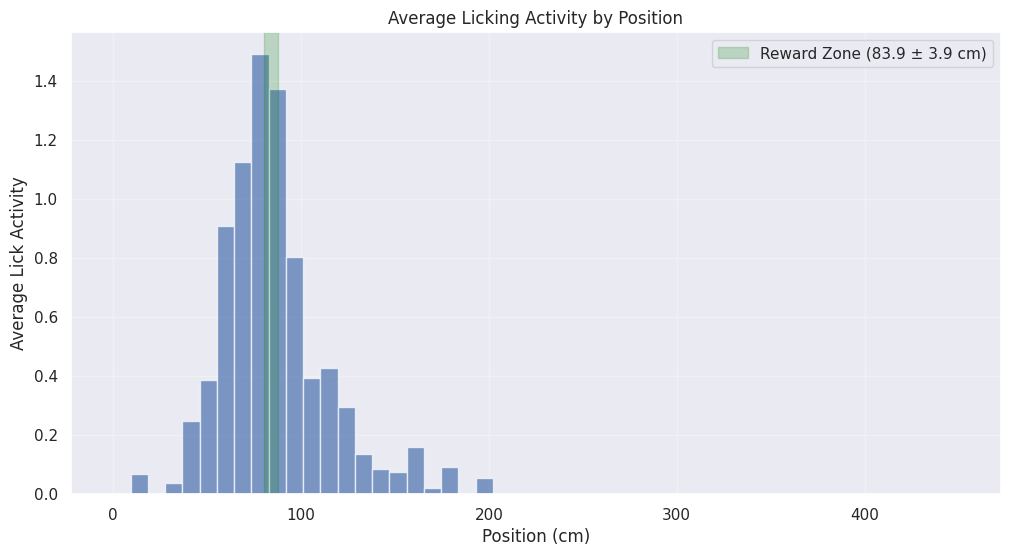

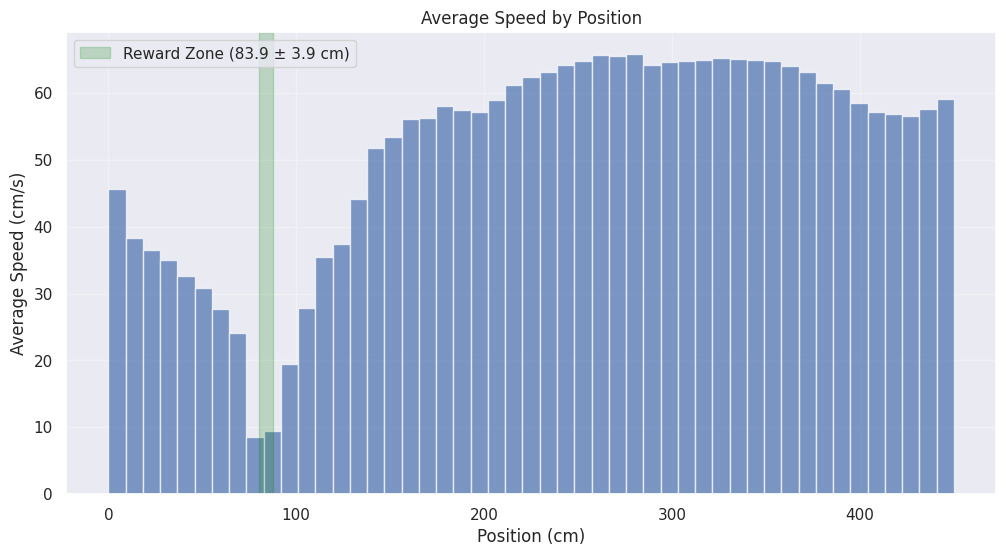

In [9]:
# Analyze licking behavior around reward zones
# Create position bins
position_bins = np.linspace(0, np.max(position_data), 50)
position_centers = (position_bins[:-1] + position_bins[1:]) / 2

# Calculate average lick rate at each position
lick_by_position = np.zeros_like(position_centers)
for i in range(len(position_centers)):
    mask = (position_data >= position_bins[i]) & (position_data < position_bins[i+1])
    if np.sum(mask) > 0:
        lick_by_position[i] = np.mean(lick_data[mask])

# Plot average lick rate by position
plt.figure(figsize=(12, 6))
plt.bar(position_centers, lick_by_position, width=(position_bins[1]-position_bins[0]), alpha=0.7)

# Mark reward zones
reward_zone_positions = position_data[reward_zone_data > 0]
if len(reward_zone_positions) > 0:
    reward_zone_mean = np.mean(reward_zone_positions)
    reward_zone_std = np.std(reward_zone_positions)
    plt.axvspan(reward_zone_mean - reward_zone_std, 
                reward_zone_mean + reward_zone_std, 
                alpha=0.2, color='green', label=f'Reward Zone ({reward_zone_mean:.1f} ± {reward_zone_std:.1f} cm)')

plt.title('Average Licking Activity by Position')
plt.xlabel('Position (cm)')
plt.ylabel('Average Lick Activity')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot speed vs position
speed_by_position = np.zeros_like(position_centers)
for i in range(len(position_centers)):
    mask = (position_data >= position_bins[i]) & (position_data < position_bins[i+1])
    if np.sum(mask) > 0:
        speed_by_position[i] = np.mean(speed_data[mask])

plt.figure(figsize=(12, 6))
plt.bar(position_centers, speed_by_position, width=(position_bins[1]-position_bins[0]), alpha=0.7)

# Mark reward zones
if len(reward_zone_positions) > 0:
    plt.axvspan(reward_zone_mean - reward_zone_std, 
                reward_zone_mean + reward_zone_std, 
                alpha=0.2, color='green', label=f'Reward Zone ({reward_zone_mean:.1f} ± {reward_zone_std:.1f} cm)')

plt.title('Average Speed by Position')
plt.xlabel('Position (cm)')
plt.ylabel('Average Speed (cm/s)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Exploring Neural Activity Data

Now that we've examined the behavioral data, let's explore the neural activity data. The NWB file contains fluorescence data from neurons in hippocampal area CA1 recorded using two-photon imaging.

In [10]:
# Get ophys (optical physiology) data
ophys_module = nwb.processing['ophys']

# Let's see what data is available
print("Available interfaces in ophys module:")
for name in ophys_module.data_interfaces.keys():
    print(f"  - {name}")

# Get fluorescence data
fluorescence = ophys_module.data_interfaces['Fluorescence']
rois_responses = fluorescence.roi_response_series['plane0']

# Get information about the ROIs (Regions Of Interest = neurons)
roi_table = rois_responses.rois.table
print(f"\nNumber of ROIs (neurons): {roi_table.id.data.shape[0]}")

# Convert to DataFrame if available
if hasattr(roi_table, 'to_dataframe'):
    roi_df = roi_table.to_dataframe()
    print(f"ROI table columns: {roi_df.columns.tolist()}")
    
    # Show the first few rows of the ROI table
    if 'iscell' in roi_df.columns:
        print("\nFirst few rows of ROI table:")
        print(roi_df.head())
        
        # Check if iscell is a structured array or a simple column
        # and count cells accordingly
        try:
            # Try to access iscell as if it's a structured array with multiple columns
            if isinstance(roi_df['iscell'].iloc[0], np.ndarray) and roi_df['iscell'].iloc[0].size > 1:
                cell_count = np.sum([cell[0] > 0.5 for cell in roi_df['iscell']])
                print(f"\nTotal number of cells: {cell_count}")
            else:
                # If it's a simple column, count directly
                cell_count = np.sum(roi_df['iscell'] > 0.5)
                print(f"\nTotal number of cells: {cell_count}")
        except (IndexError, TypeError):
            print("\nCould not determine total number of cells from iscell column.")
else:
    print("ROI table DataFrame conversion not available. Using raw data instead.")
    if hasattr(roi_table, 'iscell'):
        iscell_data = roi_table.iscell.data[:]
        if iscell_data.ndim > 1:
            print(f"\nTotal number of cells: {np.sum(iscell_data[:, 0] > 0.5)}")
        else:
            print(f"\nTotal number of cells: {np.sum(iscell_data > 0.5)}")

Available interfaces in ophys module:
  - Backgrounds_0
  - Deconvolved
  - Fluorescence
  - ImageSegmentation
  - Neuropil

Number of ROIs (neurons): 349
ROI table columns: ['pixel_mask', 'iscell', 'planeIdx']

First few rows of ROI table:
                                           pixel_mask  \
id                                                      
0   [[136, 471, 11.239327], [136, 472, 12.38877], ...   
1   [[164, 400, 15.628908], [164, 401, 17.650463],...   
2   [[209, 552, 16.836023], [209, 553, 18.55048], ...   
3   [[161, 537, 13.172347], [161, 538, 12.249123],...   
4   [[148, 458, 13.488646], [148, 459, 21.197554],...   

                        iscell  planeIdx  
id                                        
0   [0.0, 0.49814834778690403]         0  
1    [0.0, 0.8500147314559483]         0  
2    [1.0, 0.6779582307988627]         0  
3    [1.0, 0.8864013707883429]         0  
4     [1.0, 0.870102957697157]         0  

Total number of cells: 155


### Visualizing neural activity

Let's visualize the activity of a few neurons over time and correlate it with the animal's position in the virtual environment.

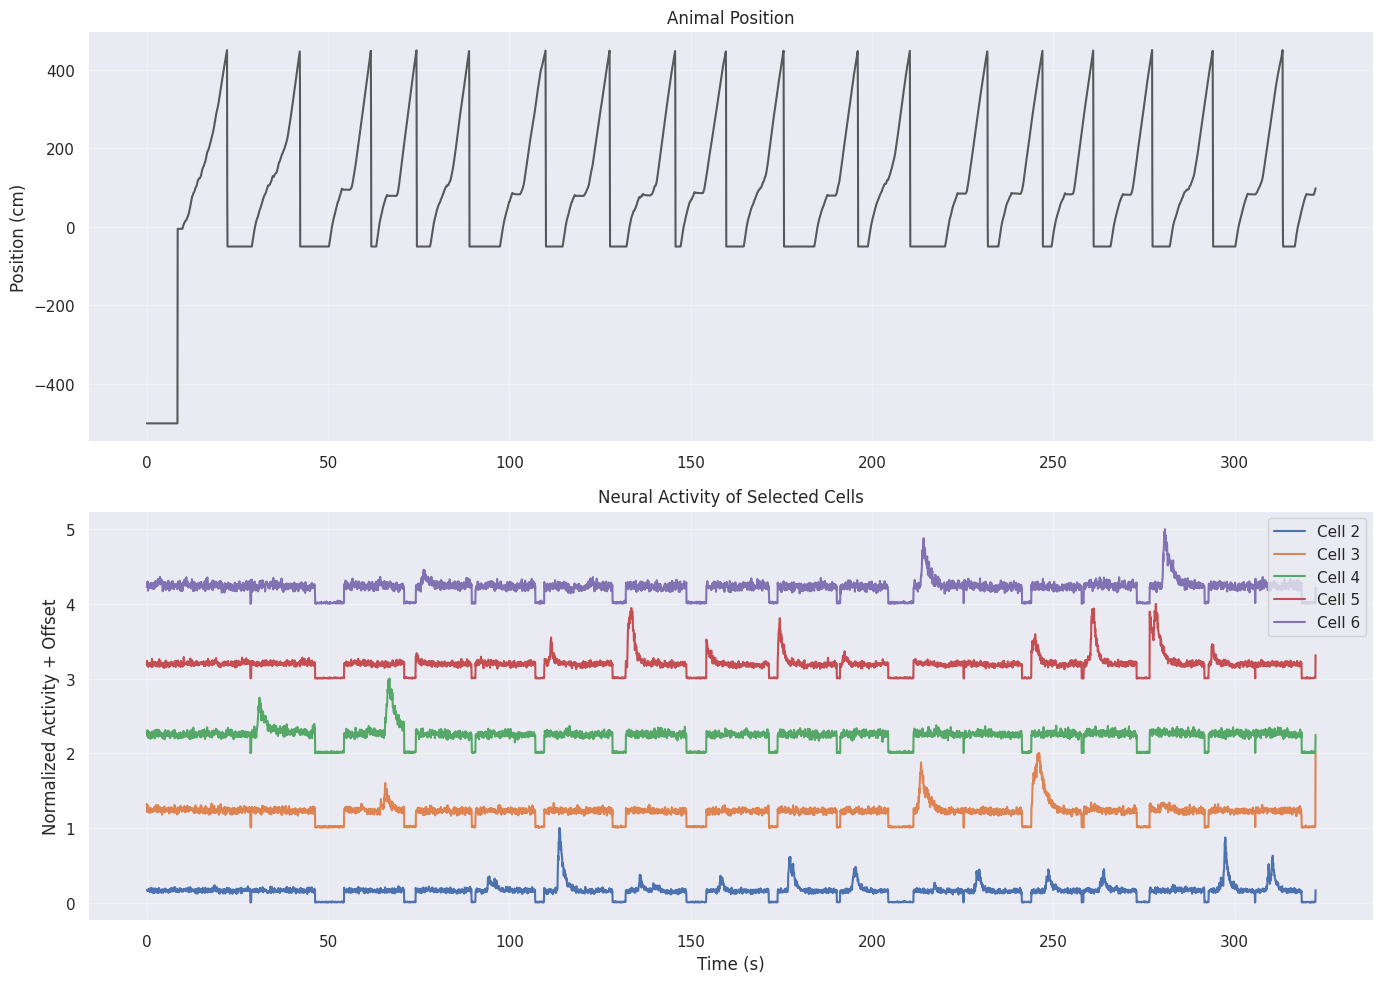

In [11]:
# Get fluorescence data for all ROIs
f_data = rois_responses.data[:]  # Shape: (time, ROIs)
f_timestamps = np.arange(f_data.shape[0]) / rois_responses.rate  # Convert frame index to time

# Select a subset of time points to match our behavioral data segment
# Use position_timestamps[-1] instead of position_timestamps[segment_end] to avoid index out of bounds
time_mask = f_timestamps < position_timestamps[-1]
f_data_subset = f_data[time_mask, :]
f_timestamps_subset = f_timestamps[time_mask]

# Identify cells (vs non-cells)
if hasattr(roi_table, 'iscell'):
    iscell_data = roi_table.iscell.data[:]
    if iscell_data.ndim > 1:
        is_cell = iscell_data[:, 0] > 0.5
    else:
        is_cell = iscell_data > 0.5
else:
    # If iscell is not available, assume all ROIs are cells
    is_cell = np.ones(f_data.shape[1], dtype=bool)

# Select a few cells to visualize
if np.sum(is_cell) > 0:
    cell_indices = np.where(is_cell)[0][:5]  # First 5 cells
    
    # Plot activity of these cells
    plt.figure(figsize=(14, 10))
    
    # Plot position
    ax1 = plt.subplot(2, 1, 1)
    position_interp = np.interp(f_timestamps_subset, position_timestamps, position_data)
    plt.plot(f_timestamps_subset, position_interp, 'k-', alpha=0.7)
    plt.ylabel('Position (cm)')
    plt.title('Animal Position')
    plt.grid(True, alpha=0.3)
    
    # Plot neural activity
    ax2 = plt.subplot(2, 1, 2, sharex=ax1)
    for i, cell_idx in enumerate(cell_indices):
        # Normalize the activity of each cell for better visualization
        cell_activity = f_data_subset[:, cell_idx]
        norm_activity = (cell_activity - np.min(cell_activity)) / (np.max(cell_activity) - np.min(cell_activity))
        plt.plot(f_timestamps_subset, norm_activity + i, label=f'Cell {cell_idx}')
    
    plt.xlabel('Time (s)')
    plt.ylabel('Normalized Activity + Offset')
    plt.title('Neural Activity of Selected Cells')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No cells identified in the dataset.")

### Place cell analysis

Let's examine if some neurons have place-specific activity (i.e., "place cells") by looking at their activity relative to the animal's position.

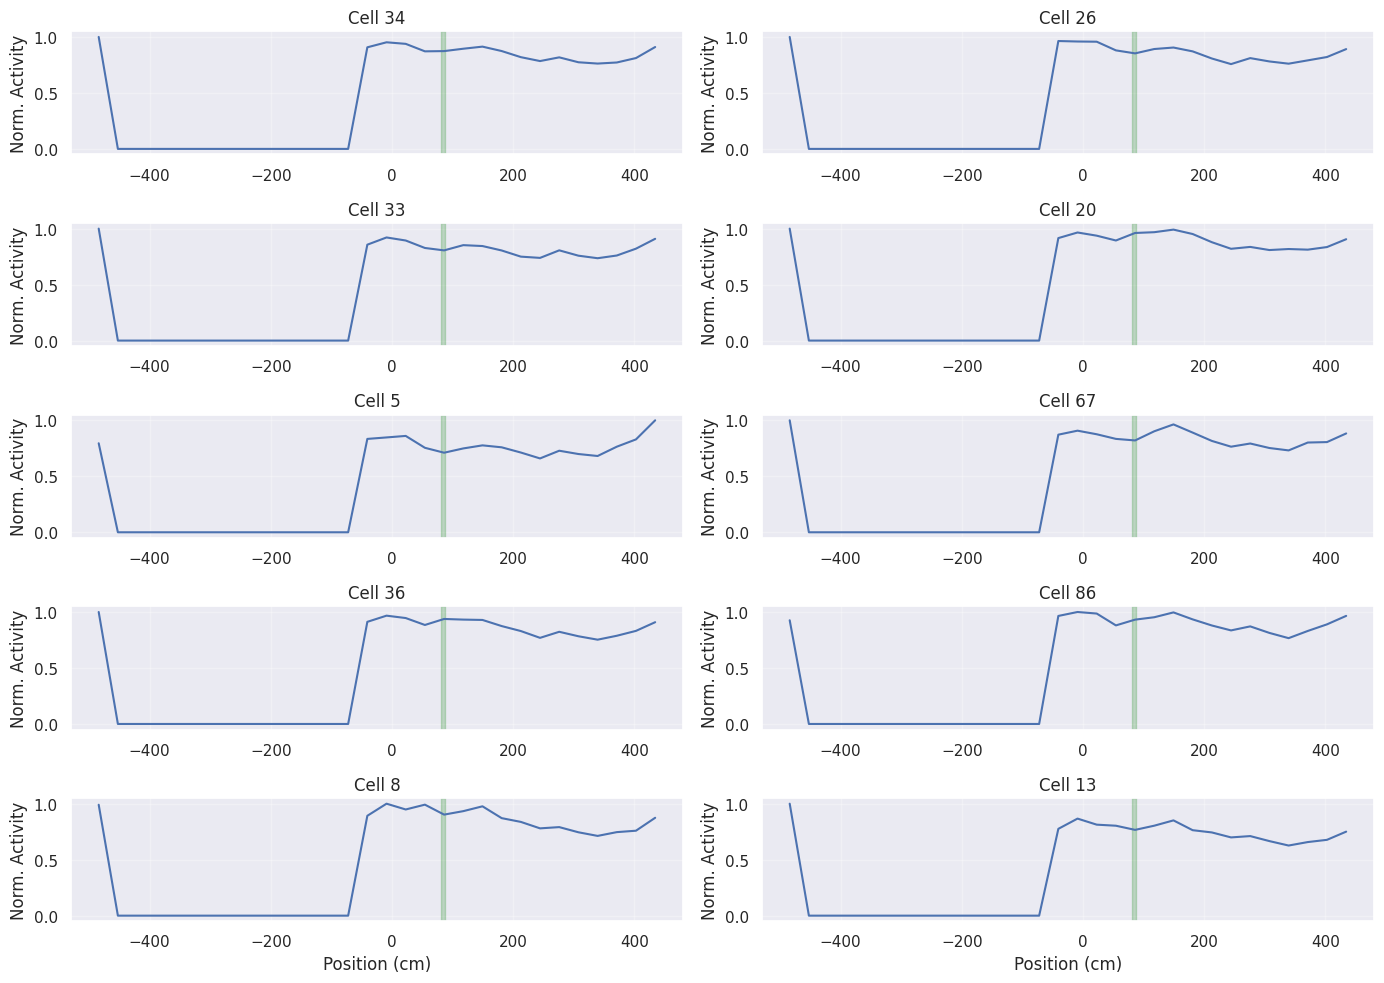

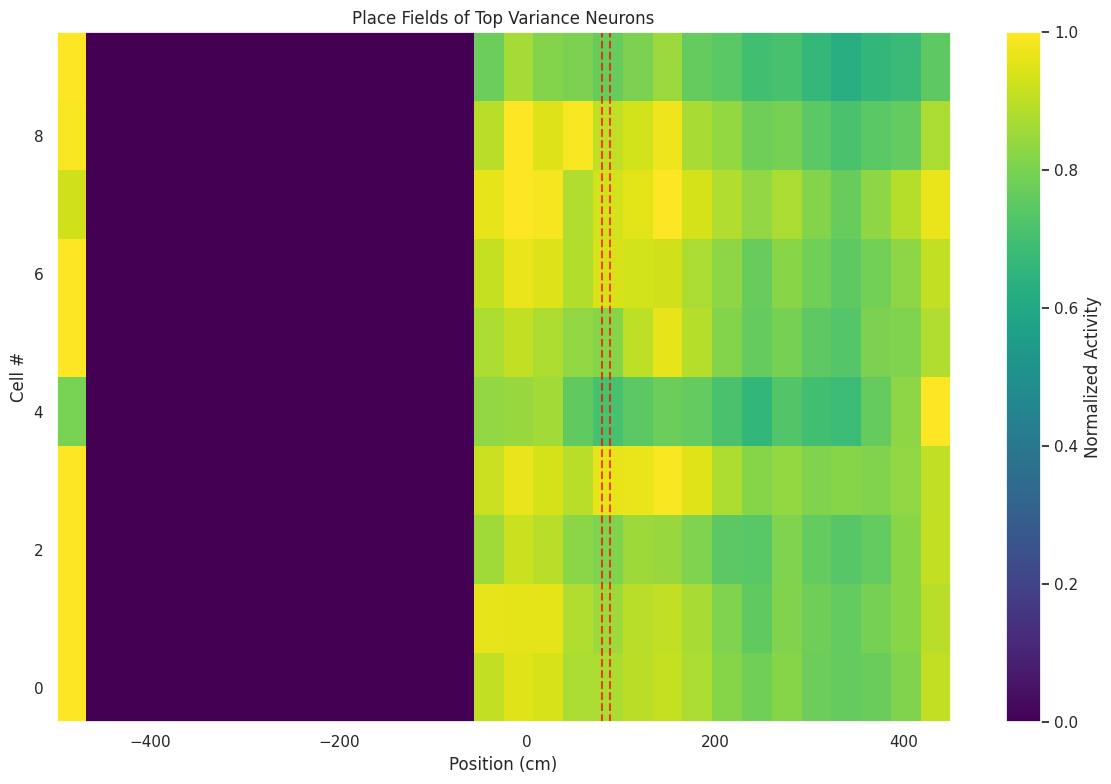

In [12]:
# Analyze place-specific activity
if np.sum(is_cell) > 0:
    # Create position bins for place cell analysis
    n_bins = 30
    pos_bins = np.linspace(np.min(position_data), np.max(position_data), n_bins + 1)
    pos_centers = (pos_bins[:-1] + pos_bins[1:]) / 2
    
    # Function to compute occupancy-normalized activity map
    def compute_place_field(cell_activity, pos_data, pos_bins):
        activity_map = np.zeros(len(pos_bins) - 1)
        occupancy = np.zeros(len(pos_bins) - 1)
        
        # Interpolate cell activity to match behavioral timestamps
        cell_activity_interp = np.interp(position_timestamps[:segment_end], 
                                         f_timestamps_subset, 
                                         cell_activity)
        
        # Compute total activity and occupancy in each bin
        for i in range(len(pos_bins) - 1):
            inbin = (pos_data >= pos_bins[i]) & (pos_data < pos_bins[i+1])
            if np.any(inbin):
                occupancy[i] = np.sum(inbin)
                activity_map[i] = np.sum(cell_activity_interp[inbin])
        
        # Normalize by occupancy
        with np.errstate(divide='ignore', invalid='ignore'):
            normalized_map = np.divide(activity_map, occupancy)
            normalized_map[np.isnan(normalized_map)] = 0
        
        return normalized_map
    
    # Select a few cells that might be place cells
    # We'll look for cells with high variance in activity
    cell_variances = np.var(f_data_subset[:, is_cell], axis=0)
    top_var_indices = np.argsort(cell_variances)[-10:]  # Top 10 cells by variance
    
    # Get the actual indices in the original data
    top_cell_indices = np.where(is_cell)[0][top_var_indices]
    
    # Compute place fields for top variance cells
    place_fields = np.zeros((len(top_cell_indices), len(pos_centers)))
    for i, cell_idx in enumerate(top_cell_indices):
        place_fields[i, :] = compute_place_field(
            f_data_subset[:, cell_idx], 
            position_data, 
            pos_bins
        )
        # Normalize each place field for visualization
        max_val = np.max(place_fields[i, :])
        if max_val > 0:
            place_fields[i, :] = place_fields[i, :] / max_val
    
    # Plot place fields
    plt.figure(figsize=(14, 10))
    
    # Plot each cell's place field
    for i, cell_idx in enumerate(top_cell_indices):
        plt.subplot(5, 2, i+1)
        plt.plot(pos_centers, place_fields[i, :], 'b-')
        plt.title(f'Cell {cell_idx}')
        plt.xlabel('Position (cm)' if i >= 8 else '')
        plt.ylabel('Norm. Activity')
        plt.grid(True, alpha=0.3)
        
        # Mark reward zones if available
        if len(reward_zone_positions) > 0:
            plt.axvspan(reward_zone_mean - reward_zone_std, 
                        reward_zone_mean + reward_zone_std, 
                        alpha=0.2, color='green')
    
    plt.tight_layout()
    plt.show()
    
    # Let's also make a heatmap of all place fields
    plt.figure(figsize=(12, 8))
    plt.pcolormesh(pos_centers, np.arange(len(top_cell_indices)), place_fields, cmap='viridis')
    plt.colorbar(label='Normalized Activity')
    plt.xlabel('Position (cm)')
    plt.ylabel('Cell #')
    plt.title('Place Fields of Top Variance Neurons')
    
    # Mark reward zones on heatmap
    if len(reward_zone_positions) > 0:
        plt.axvline(reward_zone_mean - reward_zone_std, color='red', linestyle='--', alpha=0.7)
        plt.axvline(reward_zone_mean + reward_zone_std, color='red', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
else:
    print("No cells identified in the dataset.")

## Relating Neural Activity to Reward

The key focus of the study is how hippocampal neurons encode information relative to reward. Let's examine how neural activity aligns with reward zones and reward delivery.

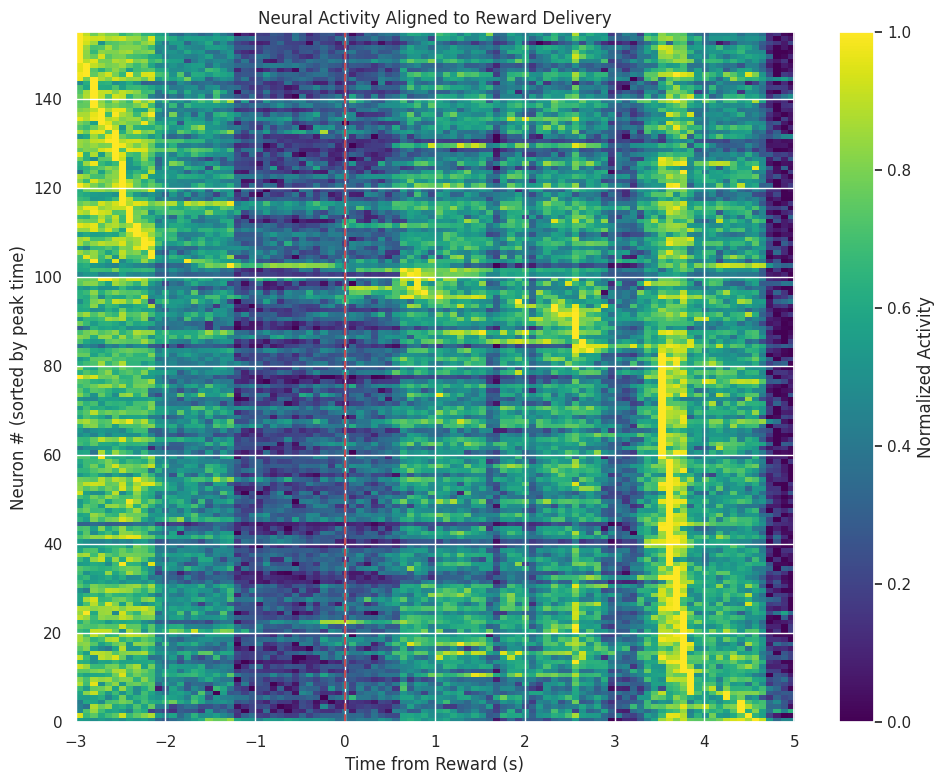

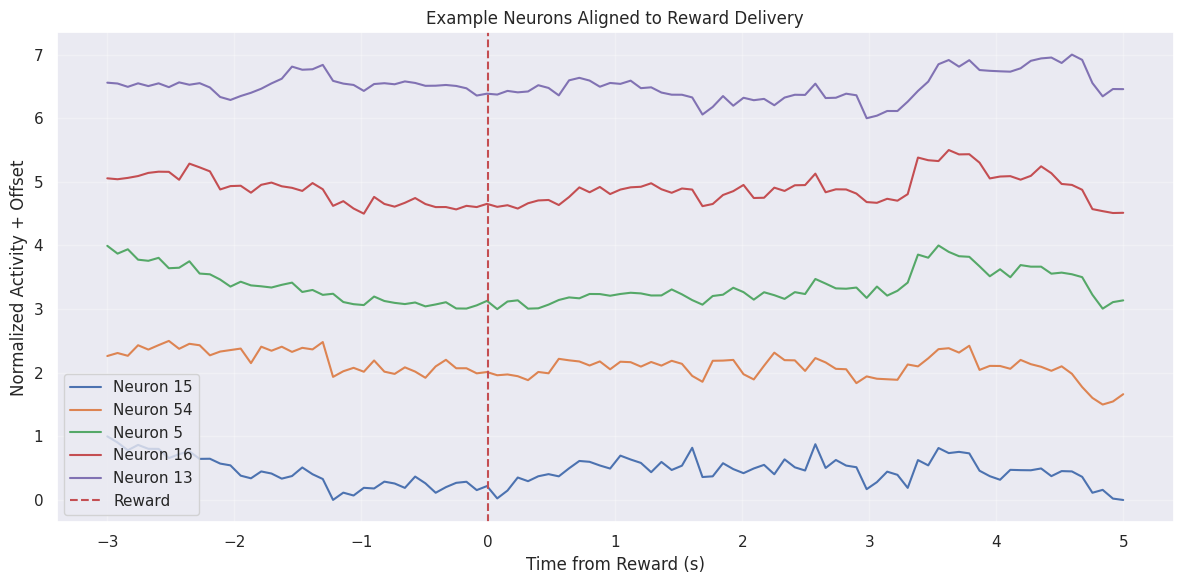

In [13]:
# Analyze neural activity around reward times

# First, identify time windows around reward deliveries
if len(reward_times) > 0:
    # Select rewards that are within our analyzed time segment
    rewards_in_segment = reward_times[reward_times < position_timestamps[-1]]
    
    if len(rewards_in_segment) > 0:
        # Define time window around rewards
        window_before = 3  # seconds before reward
        window_after = 5   # seconds after reward
        
        # Create a matrix to store neural activity around each reward
        peri_reward_activity = []
        valid_reward_indices = []
        
        for r_idx, r_time in enumerate(rewards_in_segment):
            # Find corresponding frames in fluorescence data
            start_time = r_time - window_before
            end_time = r_time + window_after
            
            # Find corresponding indices in fluorescence timestamps
            start_idx = np.searchsorted(f_timestamps, start_time)
            end_idx = np.searchsorted(f_timestamps, end_time)
            
            # Check if we have enough data around this reward
            if start_idx > 0 and end_idx < len(f_timestamps):
                valid_reward_indices.append(r_idx)
                
                # Extract activity around reward
                r_window = f_data[start_idx:end_idx, :]
                
                # Interpolate to fixed number of time points for averaging
                n_points = 100
                interp_times = np.linspace(start_time, end_time, n_points)
                interp_activity = np.zeros((n_points, r_window.shape[1]))
                
                for c in range(r_window.shape[1]):
                    interp_activity[:, c] = np.interp(
                        interp_times, 
                        f_timestamps[start_idx:end_idx], 
                        r_window[:, c]
                    )
                
                peri_reward_activity.append(interp_activity)
        
        if peri_reward_activity:
            # Convert to array and average across reward events
            peri_reward_activity = np.stack(peri_reward_activity)
            avg_peri_reward = np.mean(peri_reward_activity, axis=0)
            
            # Normalize each neuron's response
            for c in range(avg_peri_reward.shape[1]):
                min_val = np.min(avg_peri_reward[:, c])
                max_val = np.max(avg_peri_reward[:, c])
                if max_val > min_val:
                    avg_peri_reward[:, c] = (avg_peri_reward[:, c] - min_val) / (max_val - min_val)
            
            # Sort neurons by when they reach their peak activity
            if np.sum(is_cell) > 0:
                cell_activity = avg_peri_reward[:, is_cell]
                peak_times = np.argmax(cell_activity, axis=0)
                sorted_indices = np.argsort(peak_times)
                
                # Plot the heatmap of neural responses around reward
                plt.figure(figsize=(10, 8))
                plt.imshow(cell_activity[:, sorted_indices].T, 
                           aspect='auto', 
                           cmap='viridis',
                           extent=[-window_before, window_after, 0, cell_activity.shape[1]])
                plt.colorbar(label='Normalized Activity')
                plt.axvline(x=0, color='r', linestyle='--')
                plt.xlabel('Time from Reward (s)')
                plt.ylabel('Neuron # (sorted by peak time)')
                plt.title('Neural Activity Aligned to Reward Delivery')
                plt.tight_layout()
                plt.show()
                
                # Also plot a few example neurons
                n_examples = min(5, cell_activity.shape[1])
                example_indices = np.linspace(0, len(sorted_indices)-1, n_examples, dtype=int)
                
                plt.figure(figsize=(12, 6))
                time_axis = np.linspace(-window_before, window_after, avg_peri_reward.shape[0])
                
                for i, idx in enumerate(sorted_indices[example_indices]):
                    plt.plot(time_axis, cell_activity[:, idx] + i*1.5, 
                             label=f'Neuron {np.where(is_cell)[0][idx]}')
                
                plt.axvline(x=0, color='r', linestyle='--', label='Reward')
                plt.legend()
                plt.xlabel('Time from Reward (s)')
                plt.ylabel('Normalized Activity + Offset')
                plt.title('Example Neurons Aligned to Reward Delivery')
                plt.grid(True, alpha=0.3)
                plt.tight_layout()
                plt.show()
            else:
                print("No cells identified in the dataset.")
        else:
            print("No valid reward events found for analysis.")
    else:
        print("No rewards found in the analyzed time segment.")
else:
    print("No reward events found in the dataset.")

## Summary and Future Directions

In this notebook, we've explored data from Dandiset 001361, which contains two-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice.

We've demonstrated how to:
1. Load and access data from the DANDI archive
2. Explore the structure of NWB files
3. Analyze behavioral data, including position, speed, and licking
4. Visualize neural activity and identify potential place cells
5. Examine neural activity in relation to reward events

### Key findings:
- The dataset contains rich behavioral data showing how mice navigate in a virtual linear track
- Mice exhibit anticipatory licking behavior as they approach the reward zone
- The neural data shows evidence of place-specific activity (place cells)
- Some neurons show specific responses aligned to reward delivery

### Future directions:
- Analyze neural activity across multiple sessions to see how representations evolve with learning
- Compare neural responses before and after reward location changes
- Identify and characterize different neural populations (e.g., place cells vs. reward-related cells)
- Perform more sophisticated analyses such as population decoding of position or reward expectation
- Examine the relationship between speed, licking, and neural activity in more detail
- Analyze data from multiple subjects to look for consistent patterns

This dataset provides an excellent resource for studying how hippocampal neurons encode information about space and rewards, and how these representations change with experience.